# Pymaceuticals Inc.
---

### Analysis
Analysis:
1. There is a strong correlation between mouse weight and average tumor size. Would recommend further calculation to find a ratio between tumor size and weight that could be used to predict the size of an expected tumor and use those calculations to find discrepancies. 
2. The medicines with the summary statistics closest to the placebo/control were Ketapril and Naftisol. This suggests that they are the least effective of the group. Conversely, Capomulin and Ramicane were the farthest from the placebo and showed significant decreases in tumor size. This is impressive as they were both tested the most out of the group. Based on this, these medicines may be recommended to the next stage of testing. 
3. Capomulin specifically however, seems to have a small relapse as after 30 seconds of decreasing size, the tumor does increase. This should be further examined in testing to detect the cause of this relapse to prevent it from happening. The sudden drops in tumor size may also cause significant physical discomfort and should be accounted for when considering its application to humans.  
4. Infubinol does have a significant outlier that caused the tumor volume to go down drastically compared to the rest of its test group. It would be recommended to examinine the particular mouse with the outlier as well as the application of the medicine. It may be significant to improving the drug through a different method or circumstance or dismissing it. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
 
# load data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
summary_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

In [2]:
# Display the data table for preview
summary_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
total_mice = len(summary_df["Mouse ID"].unique())
total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# use duplicated to isolate duplicated values
duplicate_mice_df = summary_df[summary_df.duplicated()]
# call the specified column Mouse ID and convert into an array so it becomes callable in loc later
duplicate_mice = duplicate_mice_df["Mouse ID"].array
duplicate_mice[0]

'g989'

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# use loc to find all of the duplicates. In this case there is only 1
# there is no need for a list comphrension to iterate through an array of duplicates
duplicate_mice_all = summary_df.loc[summary_df["Mouse ID"] == duplicate_mice[0]]
duplicate_mice_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
summary_df = summary_df[summary_df["Mouse ID"] != duplicate_mice[0]]
summary_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
# need to repeat assignment to update it
total_mice = len(summary_df["Mouse ID"].unique())
total_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_df = summary_df.groupby(["Drug Regimen"])
tumor_mean = drug_df["Tumor Volume (mm3)"].mean()
tumor_median = drug_df["Tumor Volume (mm3)"].median()
tumor_var = drug_df["Tumor Volume (mm3)"].var()
tumor_std = drug_df["Tumor Volume (mm3)"].std()
tumor_sem = drug_df["Tumor Volume (mm3)"].sem()

tumor_dict = {"Mean Tumor Volume": tumor_mean,
             "Median Tumor Volume": tumor_median,
             "Tumor Volume Variance": tumor_var,
             "Tumor Volume Std. Dev.": tumor_std,
             "Tumor Volume Std. Err.": tumor_sem}
tumor_df = pd.DataFrame(tumor_dict)
tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = drug_df.agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

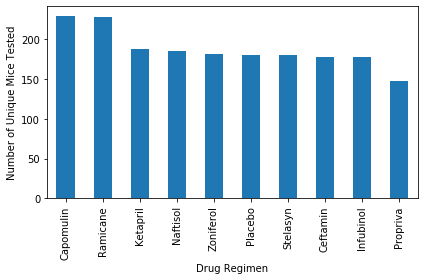

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# place here to start a new figure and prevent overlaps
fig, (ax1) = plt.subplots(1,1)

# make a new df with just the desired values for clarity
bar_df = summary_df[["Drug Regimen", "Mouse ID"]]

# calculate based on the counts of each drug
bar_plot = bar_df["Drug Regimen"].value_counts()

#plot
bar_plot.plot(kind="bar")

# labels and formatting
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.tight_layout()


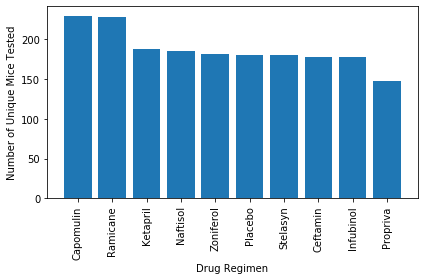

In [11]:
# place here to start a new figure and prevent overlaps
fig, (ax1) = plt.subplots(1,1)

# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
y_axis = summary_df["Drug Regimen"].value_counts()
labels = y_axis.index.values
x_axis = np.arange(len(labels))

# set up graph; colors and alpha are default
plt.bar(x_axis, y_axis, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)
# will prevent overlap of the labels 
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.tight_layout()

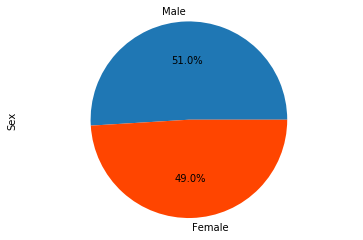

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# place here to start a new figure and prevent overlaps
fig, (ax1) = plt.subplots(1,1)

# can use value counts or size here as both will work
#either way; it should be the same as the other pie chart 
pie_plot = summary_df["Sex"].value_counts()
pie_plot = pie_plot.plot(kind="pie",autopct="%1.1f%%",colors=["tab:blue", "orangered"], ax = ax1)
plt.axis("equal")
pie_plot.set_ylabel("Sex")
pie_plot

Text(0, 0.5, 'Sex')

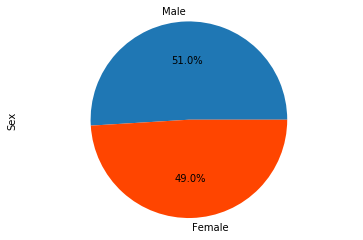

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# place here to start a new figure and prevent overlaps
fig, (ax1) = plt.subplots(1,1)

# get the sizes from the dataframe and use value counts to make it numeric
sizes = summary_df["Sex"].value_counts()

# the index of sizes will still be the sexes so it can be used here for labels
labels = sizes.index.values

# colors was defined in method in the previous one so we need a variable here
colors = ["tab:blue", "orangered"]

# plot 
ax1.pie(sizes, labels=labels, colors=colors,autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel("Sex")

# colors may look slightly different due to using different methods 

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
quartile_df = summary_df.loc[(summary_df["Drug Regimen"] == "Capomulin") | (summary_df["Drug Regimen"] == "Ramicane") |
                            (summary_df["Drug Regimen"] == "Infubinol") | (summary_df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
quartile_data = quartile_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
#quartile_data

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_quartile = pd.merge(quartile_df, quartile_data, on = "Mouse ID")

# make an empty list to help appending later
timepoint_list = []

# iterate through the merged dataframe to filter out the final timepoints by matching the initial and newly calculated timepoint
for i in merge_quartile.iterrows(): 
    if i[1]["Timepoint_x"] == i[1]["Timepoint_y"]:
        timepoint_list.append(i[1])

# place the list into dataframe and assign in the columns used in the previous dataframes 
to_box_df = pd.DataFrame(timepoint_list, columns=['Mouse ID', 'Timepoint_x', 'Tumor Volume (mm3)','Metastatic Sites',
                                          'Drug Regimen','Sex','Age_months','Weight (g)','Timepoint_y'])

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# create an empty dictionary to store the lists for plotting 
tumor_vol_dict = {}

# iterate through the list 
for drug in treatment_list:

    # iterrate through to_box which has cut the
    for i in to_box_df.iterrows():
  
        if drug == (i[1]["Drug Regimen"]): 
            tumor_vol_list.append(int(i[1]["Tumor Volume (mm3)"]))
 
    # Calculate the IQR and upper and lower bounds 
    lowerq = np.percentile(tumor_vol_list, 25)
    upperq = np.percentile(tumor_vol_list, 75)
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #iterate through the list to see if any of the values are outside the lower and upper bound
    for x in tumor_vol_list:
        if (x > upper_bound) | (x < lower_bound): 
            # if found, print out a statement saying that an outlier has been found and its value
            print(f"{drug}'s potential outlier(s): {x}")
    
    # put the tumor vol list into the dictionary and make the treatment_list value the key
    tumor_vol_dict[f"{drug}"] = tumor_vol_list
    
    # reset tumor vol for the next drug type from treatment list
    tumor_vol_list = []


Infubinol's potential outlier(s): 36


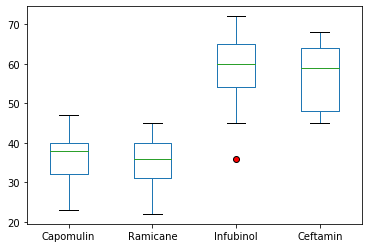

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# create a dictionary that will color any outliers when passed 
outlier_highlight = dict(markerfacecolor = "red", marker = "o")

#make a final df of the now completed dictionary 
box_plotter_df = pd.DataFrame(tumor_vol_dict)

#plot the dictionary and pass in the outlier higlight to flierprops to colors the detected outliers
box_plotter_df.plot(kind="box", flierprops = outlier_highlight)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

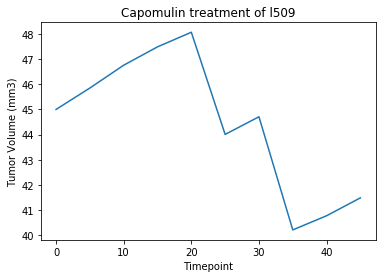

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = summary_df.loc[summary_df["Drug Regimen"] == "Capomulin"]
mouse = "l509"
one_mouse = line_df.loc[line_df["Mouse ID"] == mouse]

line_plot = one_mouse.plot(kind = "line", x = "Timepoint", y = "Tumor Volume (mm3)", title = "Capomulin treatment of " + mouse, legend = False)
line_plot.set_ylabel("Tumor Volume (mm3)")


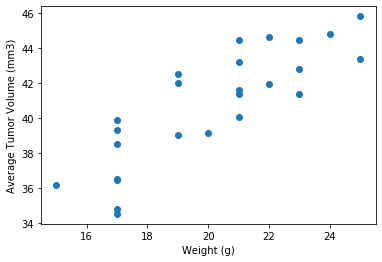

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# use loc to filter for Capomulin 
scatter_df = summary_df.loc[summary_df["Drug Regimen"] == "Capomulin"]

# groupby mouse and use mean on the whole row 
# this will combine their entries into one row with the averaged values in it 
scatter_average = scatter_df.groupby(['Mouse ID']).mean()

# plot the weight as x and the volume as y
plt.scatter(scatter_average['Weight (g)'],scatter_average['Tumor Volume (mm3)'])

#label the axes accordingly
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


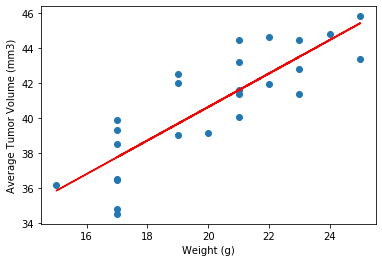

In [19]:
# Calculate the correlation coefficient (r value) and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# use the chart from before (no need for subplots)
x_values = scatter_average["Weight (g)"]
y_values = scatter_average["Tumor Volume (mm3)"]

# make the line using the sci py linregress to compute it
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is: {rvalue:.2f}")
plt.show()